<a href="https://colab.research.google.com/github/Je-Hyeon/Je-Hyeon/blob/main/Practical_stat_datascientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1장

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 절사평균, 가중평균, 가중중간값 계산

In [ ]:
! pip install wquantiles

In [ ]:
from scipy.stats import trim_mean  # 절사평균을 구하기 위해서 필요
import wquantiles                  # 가중 중간값을 구하기 위해서 필요함

In [ ]:
# 데이터는 state(미국 주별 살인률) 사용할 것임
state = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exercise: Practical statistics/Download:practical-statistics-for-data-scientists-master/data/state.csv' )

state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
# 1. 인구수 평균, 중간값 계산
print(state['Population'].mean())
print(state['Population'].median())

In [ ]:
# 2. 인구수의 절사 평균 계산 (앞 뒤 잘라낸 평균 값) -> scipy.stats 라이브러리에서 가져온 함수다

trim_mean(state['Population'],0.2)

4413915.966666667

In [ ]:
# 3. 가중평균 구하기 -> 살인률을 주 인구로 가중한 평균을 구해보자.

## average 설명: average(a, axis=None, weights=None, returned=False) Compute the weighted average along the specified axis.

np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [ ]:
# 4. 가중 중간값 구하기

wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

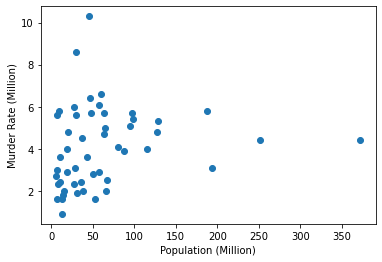

In [ ]:
# 5. 자체 과제... -> 갑자기 의문이 든다. 인구 규모와 살인률에는 차이가 있을까?

plt.scatter(state["Population"] / 100000, state["Murder.Rate"])
plt.xlabel('Population (Million)')
plt.ylabel('Murder Rate (Million)');

# 유의미한 관계는 보이지 않는 듯 함...

## 표준편차, IQR, MAD 계산

In [ ]:
from statsmodels import robust    # MAD를 계산하기 위해서 필요하다.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 1. 주별 인구의 표준편차

state['Population'].std()

6848235.347401142

In [ ]:
# 2. 주별 인구의 IQR   (quantile 사용)
# -> 결과 똑같음

np.quantile(state['Population'], 0.75) - np.quantile(state['Population'], 0.25)
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [ ]:
# 3.MAD 구하기

robust.scale.mad(state['Population'])

3849876.1459979336

## 백분위수 (한번에 여러개)


In [ ]:
# 주별 살인률의 백분위수

state['Murder.Rate'].quantile([0.25, 0.5, 0.75])

0.25    2.425
0.50    4.000
0.75    5.550
Name: Murder.Rate, dtype: float64

## BoxPlot그리기

Text(0.5, 1.0, 'Population')

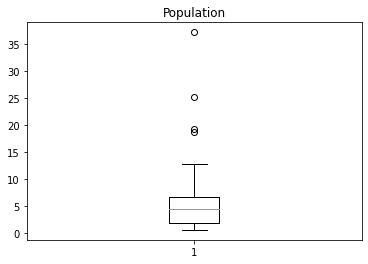

In [ ]:
# 주별 인구 상자그림 그리기

# 책에서 사용하는 방법...

plt.boxplot(state['Population'] / 1000000)
plt.title('Population')

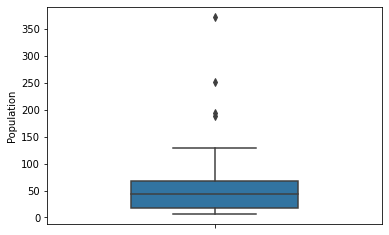

In [ ]:
# sns를 활용한 간단한 방법
# 너무 뚱뚱하게 박스그림이 나와서 width를 조절해서 날씬하게 만들어 줄 수 있다.

sns.boxplot(data = state["Population"], y=state['Population'] / 100000, width= 0.5)

## 도수분포표, 히스토그램, 밀도추정(KED)

In [ ]:
# 인구수 도수분포표만들기

#  1. cut을 사용해서 일정한 덩어리로 나누어 준다.
## 2. value_counts를 사용해서 각 덩어리의 데이터 개수를 샌다.
 
bins_pop = pd.cut(state['Population'], bins=10)
bins_pop.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

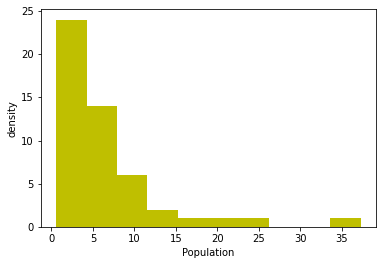

In [ ]:
# 히스토그램 그리기

plt.hist(state['Population'] / 1000000, bins = 10, color = 'y' )
plt.xlabel('Population')
plt.ylabel('density');

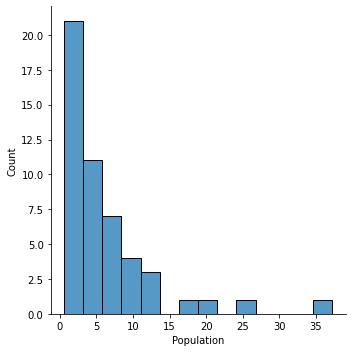

In [ ]:
# sns를 활용한 방식

sns.displot(data= state['Population']/1000000);

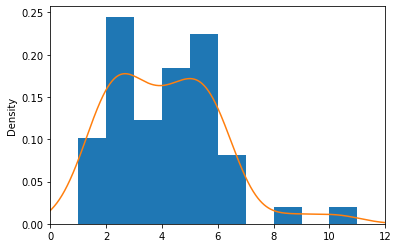

In [ ]:
# 밀도추정(kde) -> 살인률 밀도추정해보기

##  책에서 배운 방식 -> 아마 matplotlib방식
### xlim으로 x축의 limit을 설정해 줄 수 있다.
###ax=를 이용해서 두 그래프를 겹쳐줄 수 있다.

ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12] , bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)

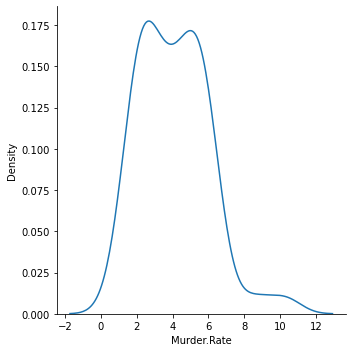

In [ ]:
# displot사용. 그냥 kind = 'kde'를 주니 밀도추정 함수만 출력한다.

sns.displot(data= state['Murder.Rate'], kind = 'kde')

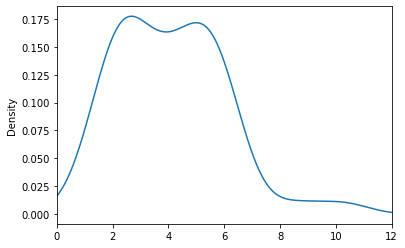

In [ ]:
# matplotlib를 사용해 kde만 출력하기. density를 사용해주면 된다.

ax = state['Murder.Rate'].plot.density(xlim=[0,12])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


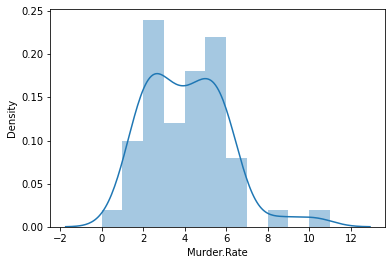

In [ ]:
# distplot 사용  -> bins를 range로 사용할 수 있다.

sns.distplot(a=state['Murder.Rate'], bins= range(0,12));

## 막대도표

In [ ]:
# 여기선 비행기 자료 사용할 것임 -> 자료는 매우 단순하다

carrier = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exercise: Practical statistics/Download:practical-statistics-for-data-scientists-master/data/dfw_airline.csv')
carrier

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


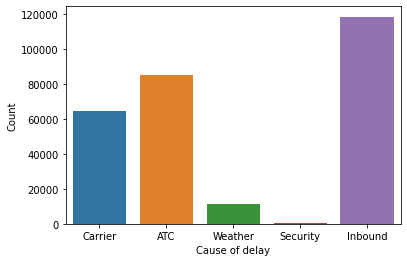

In [ ]:
# 막대도표 그려보기 -> 결항 원인(댈러스 상공)

# sns 활용 -> sns가 알아서 그래프도 잘 그려주고, 그림도 이쁘게 나오네
sns.barplot(data= carrier)
plt.xlabel('Cause of delay')
plt.ylabel('Count');

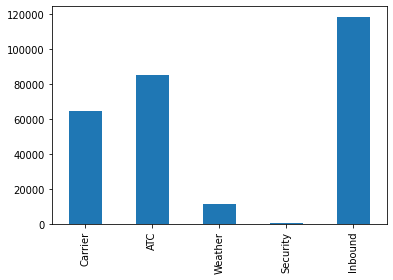

In [ ]:
# matplotlib 활용
## transpose를 안하니 데이터가 이상하게 나온다. 이유는?

ax = carrier.T.plot.bar(legend = False)

## 중간에 빠진 비행기 정보 가지고 놀기

In [ ]:
air = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exercise: Practical statistics/Download:practical-statistics-for-data-scientists-master/data/airline_stats.csv')
air.head()
# 이 데이터를 가지고 놀아보자

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [ ]:
# 어떤 항공사가 있을까?

air['airline'].unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

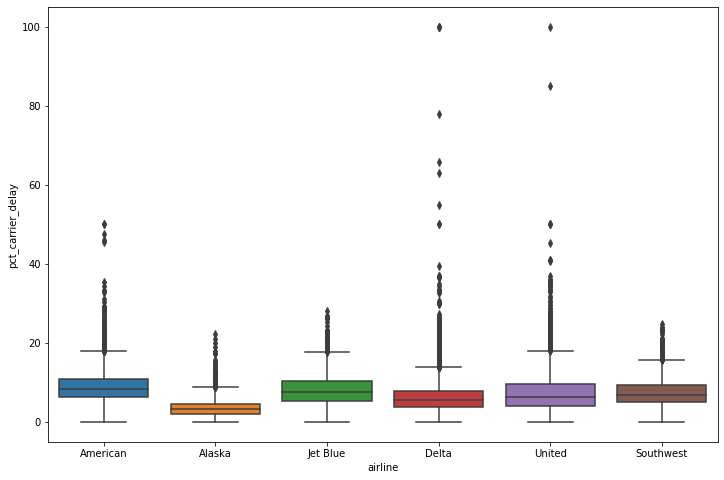

In [ ]:
# 항공사별로 비행기 자체 결함??
plt.figure(figsize= (12,8))
sns.boxplot(x= 'airline' , y = 'pct_carrier_delay' , data=air)

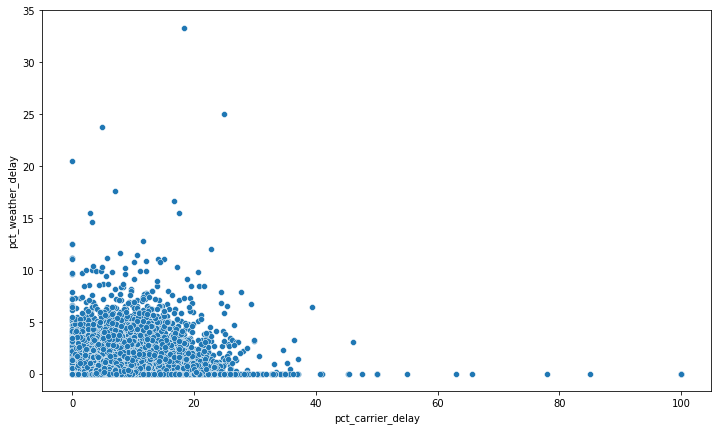

In [ ]:
# 비행기 결함과 날씨 결함은 상관관계가 존재할까???
plt.figure(figsize=(12,7))
sns.scatterplot(x='pct_carrier_delay', y='pct_weather_delay', data=air )

# 거의 없는 것 같다...

## 주식 데이터 사용


In [60]:
# 지금 데이터는 sp_data와 똑같은 데이터를 불러왔는데, index_col = 0을 사용하지 않았다. 아래와 비교해보자
sp_data_non_index_col_0 = pd.read_csv('/content/drive/MyDrive/Exercise: Practical statistics/Download:practical-statistics-for-data-scientists-master/data/sp500_data.csv.gz')
print(sp_data_non_index_col_0.head(1))

# 인덱스 0~ 5xxx 가 생기고, 날짜 인덱스는 unnamed로 붙었다.
## 정교한 처리를 위해선 날짜를 인덱스로 사용하도록 변경해 주어야 한다.

   Unnamed: 0  ADS        CA    MSFT  RHT  ...  CELG      GILD  REGN   VRTX  HSIC
0  1993-01-29  0.0  0.060124 -0.0221  0.0  ...   0.0  0.015564  1.75  0.125   0.0

[1 rows x 518 columns]


In [57]:
# 데이터 읽기

# 주식 가격 시계열 데이터, index_col = 0 사용
sp_data = pd.read_csv('/content/drive/MyDrive/Exercise: Practical statistics/Download:practical-statistics-for-data-scientists-master/data/sp500_data.csv.gz', index_col = 0)

# 회사별 섹터 정보
sp_sector = pd.read_csv('/content/drive/MyDrive/Exercise: Practical statistics/Download:practical-statistics-for-data-scientists-master/data/sp500_sectors.csv')

# 두 데이터 어떻게 생겼니??
print(sp_data.head(1))
print(sp_sector.head(1))

            ADS        CA    MSFT  RHT  CTSH  ...  CELG      GILD  REGN   VRTX  HSIC
1993-01-29  0.0  0.060124 -0.0221  0.0   0.0  ...   0.0  0.015564  1.75  0.125   0.0

[1 rows x 517 columns]
                   sector  ... symbol
0  information_technology  ...    ADS

[1 rows x 4 columns]


In [44]:
# 자~ 어떤 sector가 사용가능한 지 볼까??
sp_sector['sector'].unique()

array(['information_technology', 'industrials', 'energy',
       'consumer_discretionary', 'utilities', 'materials', 'etf',
       'telecommunications_services', 'consumer_staples', 'financials',
       'health_care'], dtype=object)

In [64]:
# 통신 산업의 2010년 이후 주식 가격을 가져오자

# 우선 통신사 티커만 뽑아오기
tel = sp_sector.loc[sp_sector['sector'] == 'telecommunications_services']['symbol']

# 날짜와, 티커에 따른 데이터 추출하기
tel_data = sp_data.loc[ sp_data.index > '2010-01-01', tel ]

tel_data.head(2)

,T,CTL,FTR,VZ,LVLT
2010-01-04,0.123776,0.082227,0.042286,-0.084631,1.2
2010-01-05,-0.189305,-0.027407,-0.030205,-0.021160,0.3


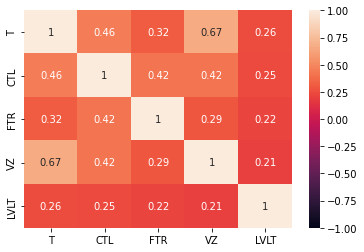

In [65]:
# 상관관계 그려보기

sns.heatmap(tel_data.corr(), vmin = -1, vmax= 1, annot= True)

In [86]:
# 시간이 흐르면서 서로의 상관관계는 어떻게 바꼈을까?
## 평균이 0에 가까울 수록 서로 다르게 움직이는 것이겠지??

tel_mean = tel_data.mean(axis= 1)
tel_mean

2010-01-04    0.272732
2010-01-05    0.006385
2010-01-06   -0.378917
2010-01-07   -0.136154
2010-01-08   -0.230259
                ...   
2015-06-25   -0.421690
2015-06-26   -0.199387
2015-06-29   -0.516549
2015-06-30   -0.263426
2015-07-01    0.101214
Length: 1383, dtype: float64

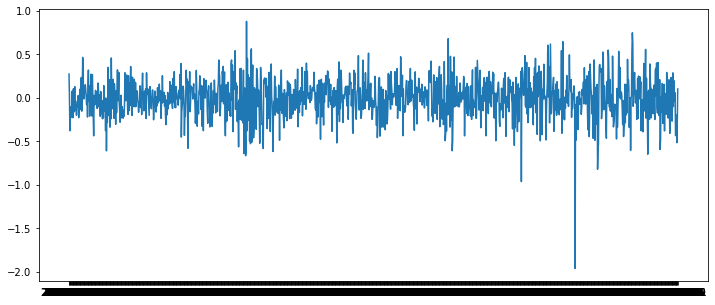

In [89]:
# 시각화 해보자..
plt.figure(figsize = (12,5))
plt.plot(tel_mean)

# 근데 이 정보를 알아도 쓸모가 전혀 없을 듯

## 집과 과세 데이터

In [93]:
df_tax = pd.read_csv('/content/drive/MyDrive/Exercise: Practical statistics/Download:practical-statistics-for-data-scientists-master/data/kc_tax.csv.gz').dropna()

# 우에 생겼노??
print(df_tax.shape)
df_tax.head()

(467363, 3)


,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


In [118]:
# 아웃라이어 들을 제거하자. 

df_tax0 = df_tax.loc[(df_tax['TaxAssessedValue'] < 750000) & (df_tax['SqFtTotLiving'] < 3500) & (df_tax['SqFtTotLiving'] > 100), :]

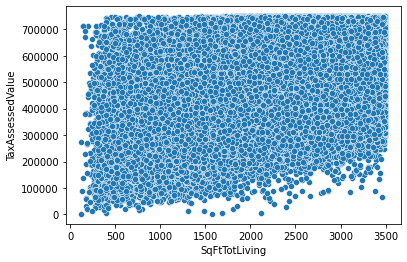

In [119]:
# 가설: 집이 클 수록, 세금을 많이 낼 것이다
## scatter plot으로 살펴보자

sns.scatterplot(x= 'SqFtTotLiving', y='TaxAssessedValue', data= df_tax0)

# 알아 낼 수가 없다....

<Figure size 360x288 with 0 Axes>

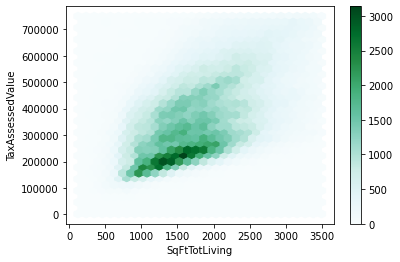

In [126]:
# hexbin으로 살펴보자

plt.figure(figsize = (5,4))

# pandas에서 제공하는 hexbin을 사용한다!!
# gridsize는 격자크기! 즉 육각형의 크기를 의미한다.
df_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize= 30, sharex = False);

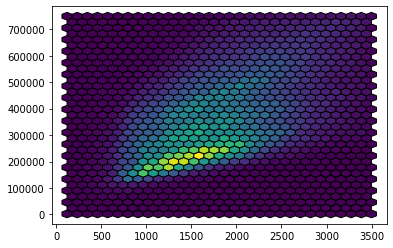

In [130]:
# matplot의 hexbin

plt.hexbin(x= 'SqFtTotLiving', y= 'TaxAssessedValue', data= df_tax0, gridsize= 30, edgecolors= 'k')

In [132]:
# 변수를 하나더 추가해보자! 우편주소인 ZipCode를 추가!!

array([9.8002000e+04, 9.8166000e+04, 9.8108000e+04, 9.8032000e+04,
       9.8168000e+04, 9.8055000e+04, 9.8122000e+04, 9.8116000e+04,
       9.8007000e+04, 9.8052000e+04, 9.8038000e+04, 9.8146000e+04,
       9.8178000e+04, 9.8118000e+04, 9.8059000e+04, 9.8008000e+04,
       9.8075000e+04, 9.8042000e+04, 9.8092000e+04, 9.8010000e+04,
       9.8051000e+04, 9.8198000e+04, 9.8065000e+04, 9.8117000e+04,
       9.8058000e+04, 9.8126000e+04, 9.8106000e+04, 9.8027000e+04,
       9.8177000e+04, 9.8045000e+04, 9.8136000e+04, 9.8144000e+04,
       9.8022000e+04, 9.8030000e+04, 9.8188000e+04, 9.8040000e+04,
       9.8033000e+04, 9.8028000e+04, 9.8072000e+04, 9.8107000e+04,
       9.8014000e+04, 9.8133000e+04, 9.8224000e+04, 9.8005000e+04,
       9.8115000e+04, 9.8053000e+04, 9.8155000e+04, 9.8001000e+04,
       9.8034000e+04, 9.8023000e+04, 9.8109000e+04, 9.8031000e+04,
       9.8077000e+04, 9.8056000e+04, 9.8004000e+04, 9.8148000e+04,
       9.8003000e+04, 9.8199000e+04, 9.8019000e+04, 9.8103000e